# MACS 30200
## Problem set #1
Mengchen Shi  
April 15th

## Part 1: Write a data section for your assigned data set (5 points)

##### (1) 
The U.S. patent data used in this paper includes all 2,923,922 United States
utility patents in the USPTO’s TAF database granted between January 1963 and
December 1999. These patent data comes from the The NBER U.S. Patent Citations
Data File, a patent and citation database developed and curated by Hall, B. H., A.
B. Jaffe, and M. Trajtenberg (2001) from National Bureau of Economic Research.
These fully functional data is stored and can be accessed freely on the NBER website:http://nber.org/patents/.


##### (2)
The U.S. patent data has been used for a variety of papers. Hu and Jaffe(2001)
study knowledge diffusion among Asian countries by studying the
inventors patented in the US.   

Hall, et al.(2005) used this dataset to
study the relationship between a firm’s patents and the market value of the firm. They confirm that the more
important of patents granted to a firm, the more market value a firm has. This indicates that innovation can
boost the market value of a firm. The same dataset is also used to study patent related issues for countries
other than the US.  

The paper published on JPE by Zhen(2017) denied the ignorance hypothesis
for patent examiners based on analysis of citations data from U.S. Patent Citations
Data File and showed that US examiners tend to devote more search effort to weaker
patents, implying that they can identify a substantial portion of the weak patents
that they issue.  

Balsmeier and Lee (2017) examines the effect of transition to independent boards
on increasing citation and find the increase comes mainly from incremental patents,
and showed no significant effect on riskier innovation strategy based on U.S. Patent
Citations Data File. 

##### (3)
U.S. Patent Citations Data File was developed from multiple different databases
by Bronwyn H. Hall Adam B. Jaffe Manuel Trajtenberg. Detailed information was
developed on almost 3 million U.S. patents granted between January 1963 and December
1999, mainly coming from numbering and reporting system to USPTO’s The
Office of Technology Assessment and Forecast database, which could dated to the
1870s. A reasonably broad match of patents to Compustat (the data set of all firms
traded in the U. S. stock market) was also included in this NBER data file.  


##### (4)

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set(style="darkgrid")

In [72]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
df = pd.read_csv('apat63_99.txt')

In [3]:
df.head()

,PATENT,GYEAR,GDATE,APPYEAR,COUNTRY,POSTATE,ASSIGNEE,ASSCODE,CLAIMS,NCLASS,CAT,SUBCAT,CMADE,CRECEIVE,RATIOCIT,GENERAL,ORIGINAL,FWDAPLAG,BCKGTLAG,SELFCTUB,SELFCTLB,SECDUPBD,SECDLWBD
0,3070801,1963,1096,NaN,BE,NaN,NaN,1,NaN,269,6,69,NaN,1,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3070802,1963,1096,NaN,US,TX,NaN,1,NaN,2,6,63,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3070803,1963,1096,NaN,US,IL,NaN,1,NaN,2,6,63,NaN,9,NaN,0.3704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3070804,1963,1096,NaN,US,OH,NaN,1,NaN,2,6,63,NaN,3,NaN,0.6667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3070805,1963,1096,NaN,US,CA,NaN,1,NaN,2,6,63,NaN,1,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2923922 entries, 0 to 2923921
Data columns (total 23 columns):
PATENT      int64
GYEAR       int64
GDATE       int64
APPYEAR     float64
COUNTRY     object
POSTATE     object
ASSIGNEE    float64
ASSCODE     int64
CLAIMS      float64
NCLASS      int64
CAT         int64
SUBCAT      int64
CMADE       float64
CRECEIVE    int64
RATIOCIT    float64
GENERAL     float64
ORIGINAL    float64
FWDAPLAG    float64
BCKGTLAG    float64
SELFCTUB    float64
SELFCTLB    float64
SECDUPBD    float64
SECDLWBD    float64
dtypes: float64(13), int64(8), object(2)
memory usage: 513.1+ MB


Among these patent variables, we have categorical variables as well as numerical
variables. So we make a brief descriptive statistics table of 9 major numerical
variables for a glimpse into these data. Here is a table of the mean and five number
summary for these variables.

In [89]:
des = df[['GYEAR', 'APPYEAR','CLAIMS', 'CMADE', 'CRECEIVE','RATIOCIT', 'GENERAL', 
          'ORIGINAL', 'FWDAPLAG', 'BCKGTLAG']].describe()

In [92]:
des.columns 

Index(['Grant Year', 'Application Year', 'number of Claims',
       'Number of Citations Made', 'Number of Citations Received',
       'Percent of Citations Made to Patents Granted Since 1963',
       'Measure of Generality', 'Measure of Originality',
       'Mean Forward Citation Lag', 'Mean Backward Citation Lag'],
      dtype='object')

In [91]:
des.columns = ['Grant Year',
               'Application Year',
               'number of Claims',
               'Number of Citations Made',
               'Number of Citations Received',
               'Percent of Citations Made to Patents Granted Since 1963',
               'Measure of Generality',
               'Measure of Originality',
               'Mean Forward Citation Lag',
               'Mean Backward Citation Lag'
]

In [95]:
des

,Grant Year,Application Year,number of Claims,Number of Citations Made,Number of Citations Received,Percent of Citations Made to Patents Granted Since 1963,Measure of Generality,Measure of Originality,Mean Forward Citation Lag,Mean Backward Citation Lag
count,2923922.00000,2699606.00000,1984055.00000,2139314.00000,2923922.00000,2088795.00000,2240348.00000,2042151.00000,2074641.00000,2088785.00000
mean,1983.54753,1983.10599,12.08283,7.72036,4.77924,0.84321,0.32054,0.34901,8.30632,14.09978
std,10.97843,10.12760,10.26838,8.99955,7.34562,0.24918,0.28496,0.28120,5.80402,11.76880
min,1963.00000,1901.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,1974.00000,1974.00000,5.00000,3.00000,1.00000,0.75000,0.00000,0.00000,4.00000,6.00000
50%,1985.00000,1985.00000,10.00000,6.00000,3.00000,1.00000,0.37500,0.42000,7.00000,10.50000
75%,1993.00000,1992.00000,16.00000,9.00000,6.00000,1.00000,0.56000,0.59380,11.50000,18.20000
max,1999.00000,1999.00000,868.00000,770.00000,779.00000,1.00000,0.93950,0.95090,96.00000,154.00000


##### (5)
Let's look at the correlation between the numerical variables we described above.

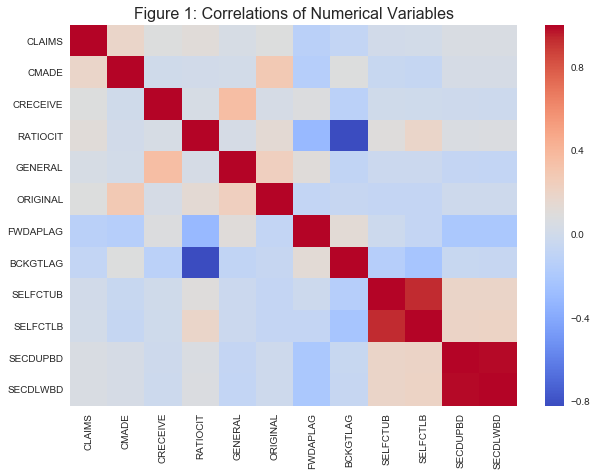

In [135]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df[['CLAIMS', 'CMADE', 'CRECEIVE','RATIOCIT', 'GENERAL', 'ORIGINAL', 'FWDAPLAG', 'BCKGTLAG', 'SELFCTUB',
       'SELFCTLB', 'SECDUPBD', 'SECDLWBD']].corr(), cmap="coolwarm")
plt.title('Figure 1: Correlations of Numerical Variables', fontsize=16)
fig.savefig('images/F1.png', bbox_inches='tight')

The heatmap above shows that there is a negative relationship between RATIOCIT (Percent of Citations Made to Patents Granted Since 1963) and BCKGTLAG (Mean Backward Citation Lag). The correlation between RATIOCIT and FWDAPLAG (Mean Forward Citation Lag) is negative as well.

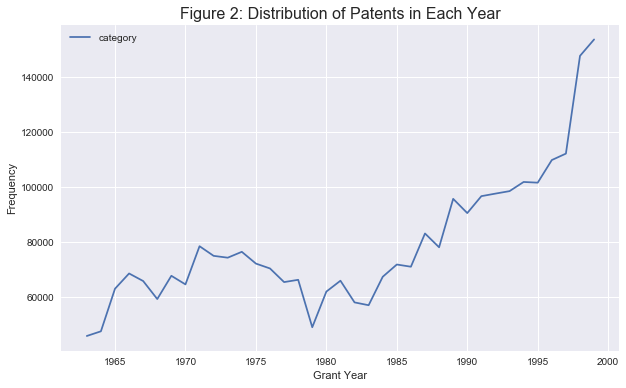

In [134]:
fig = plt.figure()
df.groupby('GYEAR')['category'].count().plot(figsize=(10,6))
plt.legend()
plt.xlabel('Grant Year')
plt.ylabel('Frequency')
plt.title('Figure 2: Distribution of Patents in Each Year', fontsize=16)
fig.savefig('images/F2.png', bbox_inches='tight')

The plot above shows that the general trend of number of patents from 1963 to 1999 is upward. However, there is a significant decrease in the number of patents from 1075 to 1979, followed by another decrease in 1983.

In [7]:
def match_cat(cat):
    if cat == 1:
        return 'Chemical'
    if cat == 2:
        return 'Computers & Communications'
    if cat == 3:
        return 'Drugs & Medical'
    if cat == 4:
        return 'Electrical & Electronic'
    if cat == 5:
        return 'Mechanical'
    if cat == 6:
        return 'Others'

In [8]:
df['category'] = df['CAT'].apply(match_cat)

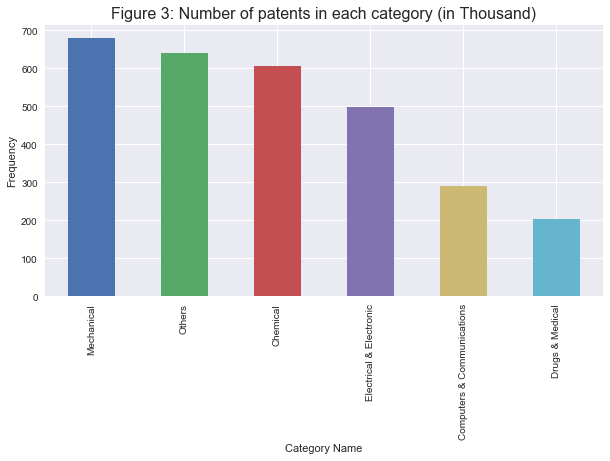

In [133]:
fig = plt.figure()
(df['category'].value_counts()/1000).plot(kind='bar',figsize=(10,5))
plt.xlabel('Category Name')
plt.ylabel('Frequency')
plt.title('Figure 3: Number of patents in each category (in Thousand)', fontsize=16)
fig.savefig('images/F3.png', bbox_inches='tight')

This figure shows that the number of patents in mechanical is the greatest from 1963 to 1999, and the number of patents in drugs & medical is the lowest.

category = df['category'].value_counts().index.tolist()

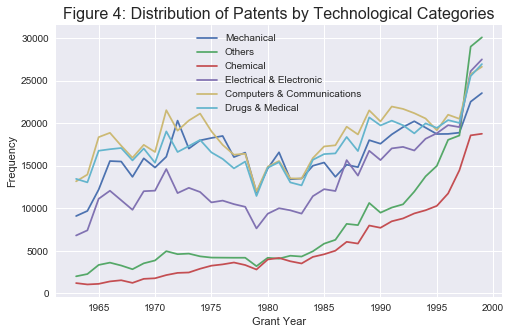

In [129]:
fig, ax = plt.subplots(figsize=(8,5))
for i in range(1, 7):
    df[df['CAT']==i].groupby('GYEAR')['category'].count().plot(label=category[i-1])
plt.legend()
plt.xlabel('Grant Year')
plt.ylabel('Frequency')
plt.title('Figure 4: Distribution of Patents by Technological Categories', fontsize=16)
fig.savefig('images/F4.png', bbox_inches='tight')

We can tell from this figure that the patents in chemical and other categories are much lower than other four categories from 1963 to 1990. After 1990, the number of patents in these two categories increase so dramatically that the gap becames smaller and smaller. The number of patents in "others" became the greatest among all categories in 1998. 